### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

### Дисциплина: Компьютерная геометрия и геометрическое моделирование

##### Студент:  Ду Нашсименту Висенте Феликс Жозе
##### Группа:   НкНбд01-20

## Москва 2023
***

Импортируем необходимые библиотеки

In [1]:
import math
import numpy as np
import cmath

## 2.2.1. Задание №1
Реализовать повороты произвольного многоугольника на заданный угол вокруг центра координат.
Создать две версии программы: первая версия должна использовать матрицы для поворота, а вторая
комплексные числа. Программа должна работатьтак, чтобы можно было легко изменить набор вершин
многоугольника и указать любой угол поворота.

### 2.2.1.1. Использование матриц для поворота многоугольника

rotate_polygon_matrix Function:

*  Получает список кортежей vertices, представляющих координаты (x, y) многоугольника, и angle_degrees, определяющий угол поворота в градусах.
* Преобразует угол из градусов в радианы с помощью math.радианс.

* Вычисляет матрицу вращения 2x2, используя синус и косинус угла.

*  Перебирает каждую вершину многоугольника, умножает ее на матрицу вращения, используя np.точка и добавляет повернутые вершины в список rotated_vertices.

* Возвращает список вершин повернутого многоугольника.

In [2]:
def rotate_polygon_matrix(vertices, angle_degrees):
#я определяю функцию с именем rotate_polygon_matrix, которая принимает два аргумента:
  #vertices (вершины многоугольника) и angle_degrees (угол в градусах для вращения).
#я преобразую угол из градусов в радианы с помощью math.
#радианы, потому что тригонометрические функции в Python работают с радианами.
#Создал матрицу вращения 2x2, используя библиотеку NumPy
    angle_radians = math.radians(angle_degrees)
    rotation_matrix = np.array([[math.cos(angle_radians), -math.sin(angle_radians)],
                                [math.sin(angle_radians), math.cos(angle_radians)]])
    rotated_vertices = []
#Эта матрица представляет преобразование вращения.
#Я инициализировал пустой список rotated_vertices для хранения вершин многоугольника после поворота.
#Я перебрал каждую вершину многоугольника, и мы применили преобразование вращения с помощью матричного умножения:
    for vertex in vertices:
        rotated_vertex = np.dot(rotation_matrix, np.array(vertex))
        rotated_vertices.append(rotated_vertex)
    return rotated_vertices
#Результатом является новая вершина после вращения.
#Добавляю повернутую вершину в список rotated_vertices.
#Наконец, функция возвращает список rotated_vertices, который содержит вершины многоугольника после поворота.

# Exemplo de uso
vertices = [(1, 1), (2, 2), (1, 3)]  # Defina os vértices do polígono
angle = 45  # Especifica o ângulo de rotação
rotated_polygon = rotate_polygon_matrix(vertices, angle)
print("Polígono Rotacionado (usando matrizes):", rotated_polygon)

Polígono Rotacionado (usando matrizes): [array([1.11022302e-16, 1.41421356e+00]), array([2.22044605e-16, 2.82842712e+00]), array([-1.41421356,  2.82842712])]


### 2.2.1.2. Использование комплексных чисел для поворота многоугольника:

rotate_polygon_complex Function:

* Получает список кортежей vertices и angle_degrees для угла поворота.

* Преобразует угол из градусов в радианы.

* Вычисляет полярную форму вращения с помощью cmath.exp (1J * angle_radians), где 1j представляет мнимую единицу в Python.

* Выполняет итерацию по каждой вершине, преобразует ее в комплексное число, умножает на комплексное число вращения и добавляет повернутые вершины в список rotated_vertices.

* Возвращает список вершин повернутого многоугольника.

In [4]:
def rotate_polygon_complex(vertices, angle_degrees):
    angle_radians = math.radians(angle_degrees)
    rotation_complex = cmath.exp(1j * angle_radians)  # Forma polar da rotação
    rotated_vertices = []
    for vertex in vertices:
        complex_vertex = complex(*vertex)
        rotated_vertex = complex_vertex * rotation_complex
        rotated_vertices.append((rotated_vertex.real, rotated_vertex.imag))
    return rotated_vertices

# Exemplo de uso
vertices = [(1, 1), (2, 2), (1, 3)]  # Defina os vértices do polígono
angle = 45  # Especifica o ângulo de rotação
rotated_polygon = rotate_polygon_complex(vertices, angle)
print("Polígono Rotacionado (usando números complexos):", rotated_polygon)


Polígono Rotacionado (usando números complexos): [(1.1102230246251565e-16, 1.414213562373095), (2.220446049250313e-16, 2.82842712474619), (-1.414213562373095, 2.8284271247461903)]


Обе функции принимают список вершин и угол поворота в качестве входных данных и возвращают список вершин повернутого многоугольника. Основное различие заключается в подходе, используемом для выполнения вращения: один использует матрицы вращения, а другой использует комплексные числа. Оба подхода действительны и эффективны для поворота многоугольника вокруг центра координат.

### 2.2.2. Задание №2
Реализовать повороты произвольного массива точек на произвольный угол вокруг заданной точки. Используйте или матрицы, или комплексные числа. Что на ваш взгляд удобнее использовать в Matplotlib и почему? Дополнительно отобразите центр поворота, дугу окружности и радиус. Радиус проведите от центра поворота к центру масс вращаемого массива точек. Визуально проверьте работу программы, взяв массив из трех точек и нарисовав треугольник. Отобразите треугольник до поворота и после.


Для выполнения вращений произвольного массива точек вокруг контрольной точки (центра вращения) можно использовать как матрицы, так и комплексные числа. В контексте Matplotlib использование матриц обычно более удобно, поскольку Matplotlib позволяет применять матричные преобразования непосредственно к точкам для создания вращения. Использование комплексных чисел может быть более эффективным для вращений вокруг точки (0, 0), но когда дело доходит до произвольного центра вращения, матрицы более универсальны и просты для понимания.

Вот пример того, как вы можете сделать это с помощью массивов в Matplotlib. Прежде чем вращать матрицу, вы должны рассчитать центр масс точек, чтобы определить радиус и дугу окружности.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

<ipython-input-6-327c5fc6f6bf>:43: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  arc = Arc(center_of_mass, 2 * radius, 2 * radius, 0, 0, angle, edgecolor='g')


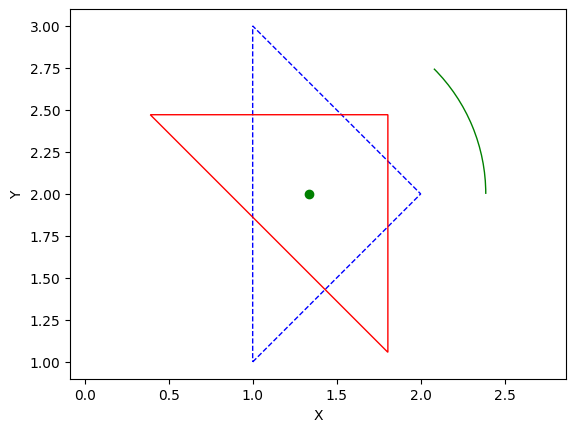

In [6]:
# Função para calcular o centro de massa dos pontos
def calculate_center_of_mass(points):
    return np.mean(points, axis=0)

# Função para realizar rotação em torno de um ponto arbitrário
def rotate_points_around_center(points, center, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                [np.sin(angle_radians), np.cos(angle_radians)]])
    rotated_points = np.dot(points - center, rotation_matrix.T) + center
    return rotated_points

# Define a matriz de pontos do triângulo
points = np.array([[1, 1], [2, 2], [1, 3]])

# Calcula o centro de massa dos pontos
center_of_mass = calculate_center_of_mass(points)

# Define o ângulo de rotação
angle = 45

# Realiza a rotação dos pontos em torno do centro de massa
rotated_points = rotate_points_around_center(points, center_of_mass, angle)

# Cria a figura e os eixos do gráfico
fig, ax = plt.subplots()

# Desenha o triângulo original
triangle_original = plt.Polygon(points, fill=None, edgecolor='b', linestyle='--')
ax.add_patch(triangle_original)

# Desenha o triângulo rotacionado
triangle_rotated = plt.Polygon(rotated_points, fill=None, edgecolor='r')
ax.add_patch(triangle_rotated)

# Desenha o centro de rotação
ax.plot(center_of_mass[0], center_of_mass[1], 'go')

# Calcula o raio entre o centro de rotação e o centro de massa
radius = np.linalg.norm(center_of_mass - points[0])

# Desenha o arco circular
arc = Arc(center_of_mass, 2 * radius, 2 * radius, 0, 0, angle, edgecolor='g')
ax.add_patch(arc)

# Configurações do gráfico
ax.set_aspect('equal', adjustable='datalim')
plt.xlabel('X')
plt.ylabel('Y')

# Exibe o gráfico
plt.show()

Функция rotate_points_around_center вычисляет вращение точек вокруг контрольной точки (в данном случае центра масс) с использованием матрицы вращения. Центр вращения отмечен зеленым кружком, а круговая дуга нарисована, чтобы указать угол поворота. Исходный треугольник нарисован синей пунктирной линией, а повернутый треугольник нарисован Красной непрерывной линией.

Когда вы запустите код, вы увидите, что исходный треугольник, повернутый треугольник, центр вращения, дуга окружности и радиус скользят от центра вращения к центру масс повернутого треугольника. Вы можете настроить точки треугольника и угол поворота по мере необходимости, чтобы увидеть различные настройки.

### 2.2.3. Задание №3
Реализуйте отражение произвольного многоугольника относительно прямой,проходящей через центр координат под заданным углом. Покажите, что два отражения подряд относительно двух прямых эквивалентно одному повороту. Каков угол такого поворота? Используйте на выбор или комплексные числа, или матрицы с векторами.

Чтобы выполнить отражение произвольного многоугольника относительно линии, проходящей через центр координат под определенным углом, можно использовать матрицы вращения и линейные преобразования. Идея состоит в том, чтобы дважды отразить многоугольник относительно двух линий, наклоненных в противоположных направлениях, чтобы получить вращение.

Во-первых, чтобы выполнить отражение относительно наклонной линии с углом $\theta$ , вы можете использовать матрицу обратного вращения. Матрица вращения для угла $\theta$ задается формулой:

$
R = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$

Для отражения относительно этой линии вам нужно выполнить обратное вращение, что означает замену
$\theta, -\theta$ в матрице вращения. Таким образом, матрица отражения относительно наклонной линии с углом $\theta$ задается формулой:

$
R = \begin{bmatrix}
\cos(\theta) & -\sin(-\theta) \\
\sin(-\theta) & \cos(-\theta)
\end{bmatrix}
$
$
= \begin{bmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{bmatrix}
$

Если вы выполняете два последовательных отражения относительно двух линий, наклоненных в противоположных направлениях (т. е. первое отражение относительно линии с углом θ и второе отражение относительно линии с углом − θ), результатом будет вращение 2θ вокруг координатного центра.

In [7]:
# Função para realizar a reflexão em relação a uma linha com ângulo theta
def reflection_matrix(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return np.array([[cos_theta, sin_theta],
                     [sin_theta, -cos_theta]])

# Função para realizar duas reflexões sucessivas e obter a rotação
def double_reflection_rotation_matrix(theta):
    reflection_matrix_1 = reflection_matrix(theta)
    reflection_matrix_2 = reflection_matrix(-theta)
    rotation_matrix = np.dot(reflection_matrix_2, reflection_matrix_1)
    return rotation_matrix

# Exemplo de uso
theta = np.radians(45)  # Ângulo de 45 graus para a linha de reflexão
rotation_matrix = double_reflection_rotation_matrix(theta)
print("Matriz de Rotação Resultante:")
print(rotation_matrix)

Matriz de Rotação Resultante:
[[ 1.99673462e-16  1.00000000e+00]
 [-1.00000000e+00  1.79380389e-16]]


### 2.2.4. Задание №4
Первые два задания анимировать (создать видео) или использовать ползунок для изменения угла с шагом в 1 градус (можно и меньше).

In [8]:
from matplotlib.patches import Polygon
from matplotlib.animation import FuncAnimation

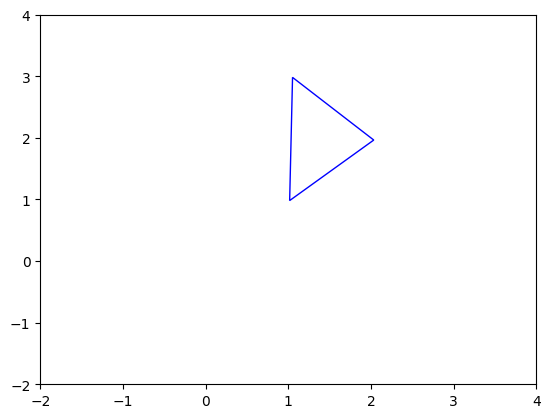

In [9]:


# Полигон для задачи поворота
polygon_vertices = np.array([[1, 1], [2, 2], [1, 3]])

# Угол для поворота (в градусах)
rotation_angle = 0

# Создание окна графика
fig, ax = plt.subplots()

# Функция для инициализации графика
def init():
    ax.set_xlim(-2, 4)
    ax.set_ylim(-2, 4)
    return []

# Функция для анимации поворота полигона
def animate_rotation(frame):
    global rotation_angle
    ax.cla()
    rotated_vertices = rotate_points_around_center(polygon_vertices, np.array([0, 0]), rotation_angle)
    ax.add_patch(Polygon(rotated_vertices, fill=None, edgecolor='b'))
    ax.set_xlim(-2, 4)
    ax.set_ylim(-2, 4)
    rotation_angle += 1  # Шаг поворота в градусах
    return []

# Функция для выполнения поворота полигона вокруг центра
def rotate_points_around_center(points, center, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                [np.sin(angle_radians), np.cos(angle_radians)]])
    rotated_points = np.dot(points - center, rotation_matrix.T) + center
    return rotated_points

# Создание анимации
ani = FuncAnimation(fig, animate_rotation, frames=360, init_func=init, blit=True)

# Сохранение анимации в видео файл
ani.save('rotation_animation.mp4', writer='ffmpeg', fps=30)

# Отображение графика (показывает последний кадр анимации)
plt.show()

### 2.2.5. Задание №5
Запрограммировать плоскую кинематическую пару. Исходные данные: длины двух звеньев и углы поворота звеньев относительно друг друга.

In [10]:
# Função para calcular as coordenadas (x, y) do ponto final do primeiro elo
def calculate_link1_end(L1, theta1):
    x1 = L1 * math.cos(math.radians(theta1))
    y1 = L1 * math.sin(math.radians(theta1))
    return x1, y1

# Função para calcular as coordenadas (x, y) do ponto final do segundo elo
def calculate_link2_end(L1, L2, theta1, theta2):
    x1, y1 = calculate_link1_end(L1, theta1)
    x2 = x1 + L2 * math.cos(math.radians(theta1 + theta2))
    y2 = y1 + L2 * math.sin(math.radians(theta1 + theta2))
    return x2, y2

# Exemplo de uso
L1 = 3  # Comprimento do primeiro elo
L2 = 2  # Comprimento do segundo elo
theta1 = 30  # Ângulo de rotação do primeiro elo em graus
theta2 = 45  # Ângulo de rotação do segundo elo em graus

# Calcula as coordenadas do ponto final do primeiro elo
x1, y1 = calculate_link1_end(L1, theta1)
print(f"Coordenadas do ponto final do primeiro elo: ({x1}, {y1})")

# Calcula as coordenadas do ponto final do segundo elo
x2, y2 = calculate_link2_end(L1, L2, theta1, theta2)
print(f"Coordenadas do ponto final do segundo elo: ({x2}, {y2})")

Coordenadas do ponto final do primeiro elo: (2.598076211353316, 1.4999999999999998)
Coordenadas do ponto final do segundo elo: (3.1157143015583575, 3.4318516525781364)


### 2.2.6. Задание №6

Используя кинематическую пару анимировать произвольную циклоидальную кривую. Программа должна уметь рисовать любую такую кривую. В качестве примера можно использовать кривые из таблицы 1.


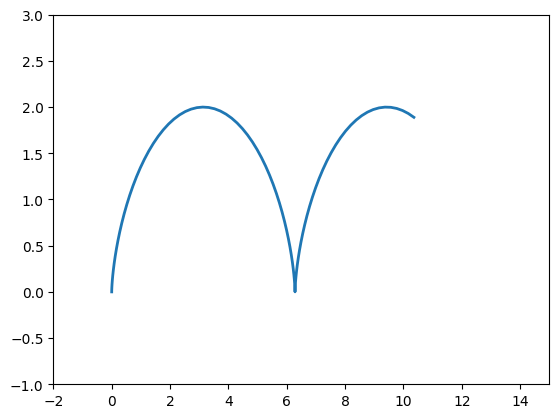

In [13]:
# Constantes para a curva cicloidal
A = 1
B = 1

# Função para calcular as coordenadas da curva cicloidal para um dado parâmetro t
def cycloidal_curve(t):
    x = A * t - B * np.sin(t)
    y = B - B * np.cos(t)
    return x, y

# Função de inicialização da animação
def init():
    line.set_data([], [])
    return line,

# Função de atualização da animação
def animate(frame):
    t = np.linspace(0, frame / 10, frame)
    x, y = cycloidal_curve(t)
    line.set_data(x, y)
    return line,

# Criando a figura e o eixo do gráfico
fig, ax = plt.subplots()
ax.set_xlim(-2, 15)
ax.set_ylim(-1, 3)
line, = ax.plot([], [], lw=2)

# Criando a animação
ani2 = FuncAnimation(fig, animate, frames=100, init_func=init, blit=True)
ani2.save('ciclodial.mp4', writer='ffmpeg', fps=30)
# Exibindo a animação
plt.show()

<ipython-input-22-e9b30855764d>:87: UserWarning: frames=<function get_pos at 0x79fb9d103640> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  myAnimation = animation.FuncAnimation(fig, animate, get_pos,


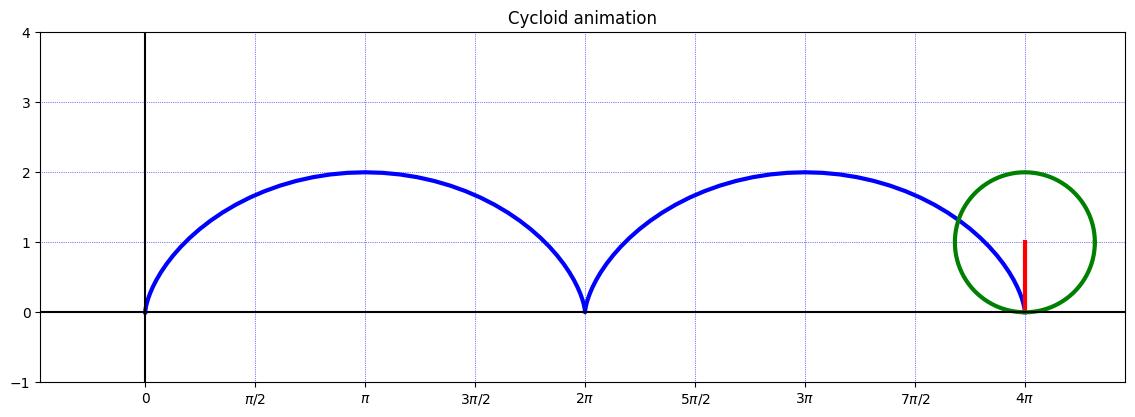

In [22]:
from numpy import pi
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from fractions import Fraction

theta = np.linspace(0, 2 * pi, 500);
r = np.ones(500)
x = r * np.cos(theta)
y = r * np.sin(theta)

dtheta = pi / 25;

# Distance of point on radius from center.
# P < 1 then trochoid, P >= 1 cycloid
P = 1

fig = plt.figure()
ax = plt.axes()

fig.set_figheight(7)
fig.set_figwidth(14)

xdata, ydata = [], []
trace = Line2D([], [], color='blue', linewidth = 3)
ax.add_line(trace)

rad = Line2D([0, 0], [0, -P], color='red', linewidth = 3)
ax.add_line(rad)

line = Line2D(x, y, color='green', linewidth = 3)
ax.add_line(line)

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(-1.5, 14), ylim=(-1, 4))
ax.grid(color='blue', linewidth = 0.5, linestyle = 'dotted')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title('Cycloid animation')

def format_func(value, tick_number):
    n = Fraction(value / pi).numerator
    d = Fraction(value / pi).denominator
    if n == 0:
        return "0"
    elif n == 1 and d == 1:
        return r"$\pi$"
    elif n == 1 and d != 1:
        return r"$\pi/{0}$".format(d)
    elif n != 1 and d == 1:
        return r"${0}\pi$".format(n)
    else:
        return r"${0}\pi/{1}$".format(n, d)

def trans2d(x,y,tx,ty,phi):
    xx = x*np.cos(phi) - y*np.sin(phi) + tx
    yy = x*np.sin(phi) + y*np.cos(phi) + ty
    return(xx,yy)

def init():
    trace.set_data([], [])
    rad.set_data([0, 0], [0, -P])
    line.set_data([], [])
    return line, rad, trace

def get_pos(theta = 0):
    while theta < 4*pi:
        ax = np.array([0, 0])
        by = np.array([0, -P])
        dx,dy = trans2d(ax, by, theta, 1, -theta)
        yield theta, dx, dy
        theta += dtheta

def animate(pos):
    theta, dx, dy = pos
    line.set_data(x + theta, y + 1)
    rad.set_data(dx, dy)
    xdata.append(dx[1])
    ydata.append(dy[1])
    trace.set_data(xdata, ydata)
    return line, rad, trace

ax.xaxis.set_major_locator(plt.MultipleLocator(pi / 2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, get_pos,
                                      interval=20, blit=True, repeat=False, init_func=init)
myAnimation.save('ciclo.mp4', writer='ffmpeg', fps=30)
plt.show()